
# CREDIT EXPLORATORY DATA ANALYSIS





Problem Statement

***Introduction:*** 
This project focuses on the application of Exploratory Data Analysis (EDA) within a practical business context. The project focuses on utilizing EDA techniques to gain insight into risk analytics in the banking and financial services sector.

***Business Understanding:***
Loan providers often face challenges in assessing loan applications, especially when applicants have limited or no credit history. This situation creates opportunities for individuals to exploit the system by defaulting on loans. Imagine working for a consumer finance company specializing in lending to urban customers. The goal is to employ EDA to analyze data patterns, ensuring that deserving loan applicants are not rejected.

When evaluating loan applications, the company must consider two types of risks:

Loss of Business: Rejecting a loan application from a potentially creditworthy applicant results in missed business opportunities. Financial Loss: Approving a loan for an applicant likely to default leads to financial losses. The dataset provided includes information on loan applications, categorized into two scenarios:

Clients with payment difficulties, characterized by late payments exceeding a specified threshold on initial loan installments. All other cases where payments are made on time. Decision outcomes for loan applications include:
Approved Cancelled Refused Unused offer

***Business Objectives:*** This project aims to identify predictive patterns indicating clients' difficulties in repaying installments. These insights can inform strategic actions such as adjusting loan terms, imposing higher interest rates on risky applicants, or denying loans altogether. The ultimate goal is to ensure deserving loan applicants are not overlooked based on erroneous risk assessments. Through EDA, the study seeks to pinpoint significant variables influencing loan default, enabling the company to refine its risk assessment strategies.

***Recommendation:*** To enhance comprehension of the domain, conduct independent research on risk analytics, particularly focusing on variable types and their implications. The dataset comprises three files: 'application_data.csv' containing client information at the time of application, 'previous_application.csv' detailing previous loan data, and 'columns_description.csv' serving as a data dictionary explaining variable meanings.


***AIM:*** Assisting the bank in making loan approval decisions by analyzing applicant profiles, thereby aiding in the prevention of financial losses for the bank.




IMPORT WARNINGS:

In [59]:
import warnings
warnings.filterwarnings('ignore')

IMPORT LIBRARIES:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(color_codes=True)

In [61]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

LOAD DATAFILES:

In [62]:
NewAppData=pd.read_csv("application_data (1).csv")
PreAppData=pd.read_csv("previous_application (1).csv")

In [63]:
# Column discription 

import chardet

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Detect encoding and read CSV file
encoding = detect_encoding('columns_description.csv')
column_description_df = pd.read_csv('columns_description.csv', encoding=encoding, usecols=['Table', 'Row', 'Description'])

# Display the DataFrame
column_description_df.columns = ['Table', 'Column', 'Description']  # Rename columns for clarity
column_description_df.head(124)

,Table,Column,Description
0,application_data,SK_ID_CURR,ID of loan in our sample
1,application_data,TARGET,Target variable (1 - client with payment diffi...
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_data,CODE_GENDER,Gender of the client
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car
...,...,...,...
119,application_data,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...
120,application_data,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...
121,application_data,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the...
122,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...


In [64]:
column_description_df.tail(10)

,Table,Column,Description
150,previous_application.csv,NAME_SELLER_INDUSTRY,The industry of the seller
151,previous_application.csv,CNT_PAYMENT,Term of previous credit at application of the ...
152,previous_application.csv,NAME_YIELD_GROUP,Grouped interest rate into small medium and hi...
153,previous_application.csv,PRODUCT_COMBINATION,Detailed product combination of the previous a...
154,previous_application.csv,DAYS_FIRST_DRAWING,Relative to application date of current applic...
155,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...
156,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...
157,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...
158,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...
159,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...


Lets INSPECT BOTH THE DATAFRAMES

In [65]:
NewAppData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
PreAppData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


From the above two tables we can conclude that :

 "SK_ID_CURR" is the Unique Identifier
 
 There is no issue with the metadata /format and stucture of the two tables.
 
 Index and headers are rightly present

In [67]:
print(NewAppData.shape)
print(PreAppData.shape)

(307511, 122)
(1670214, 37)


LETS FIRST CONSIDER "NewAppData" :


In [68]:
NewAppData.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [69]:
NewAppData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# HANDLING MISSING VALUES/NULL VALUES:



Approach to handle missing values
Identify and drop all the columns that have more than 30% missing values.
Identify missing values and proceed for Imputation i.e either by the following:
1) Mean/Median for numerical attributes
2) Mode for categorical attributes

NOTE:Some values are Imputed for Demonstration

Mean, median, and mode are statistical measures used to describe the central tendency of a dataset, with the mean representing the average, the median indicating the middle value, and the mode identifying the most frequently occurring value.

In [52]:
missing = NewAppData.count()/len(NewAppData)
missing = (1-missing)*100
missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Percentage of the missing values:

The threshold selected to drop the missing values is 30%. Lets drop all the columns containing more than 30% of missing values


In [70]:
NewAppData = NewAppData.drop(NewAppData.columns[NewAppData.isnull().mean() >= 0.5], axis = 1)

In [71]:
NewAppData.shape

(307511, 81)

In [73]:
122-81

41

(122-81)= 41 Columns were dropped in the previous step 

In [74]:
NewAppData.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [56]:
#Following the analysis, certain columns or records are identified as unnecessary and irrelevant to the analysis. 
#Therefore, they should be removed. To facilitate this process, a list is compiled to streamline the drop function.



ToDrop = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',    
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2' ]

NewAppData = NewAppData.drop(ToDrop, axis = 1)



In [75]:
NewAppData.shape

(307511, 81)

In [76]:
NewAppData.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

Upon additional examination, it was found that 5 columns have missing records that require attention: AMT_ANNUITY (Numerical), AMT_GOODS_PRICE (Numerical), NAME_TYPE_SUITE (Categorical), CNT_FAM_MEMBERS (Numerical), and DAYS_LAST_PHONE_CHANGE (Numerical). Here are the steps to address this:

Utilize a Boxplot to assess outliers in Numerical data. If outliers are present, employ the Median for Imputation; otherwise, use the Mean for Imputation.
For Categorical data, apply the Mode for Imputation.








1.'AMT_ANNUITY'

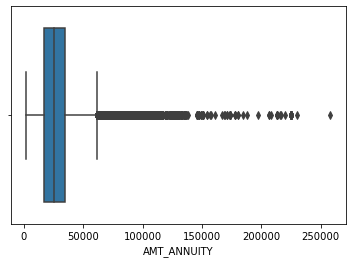

In [18]:
sns.boxplot(NewAppData['AMT_ANNUITY'])
plt.show()

In [19]:
values=NewAppData['AMT_ANNUITY'].median()
print(values)

24903.0


Replace Nulls with the above value

In [20]:

NewAppData['AMT_ANNUITY'] = NewAppData['AMT_ANNUITY'].fillna(NewAppData['AMT_ANNUITY']== "24903.0")


We will repeat the same for all other Attributes

AMT_GOODS_PRICE

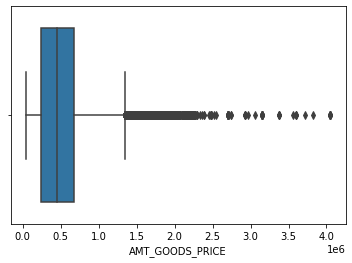

In [21]:
sns.boxplot(NewAppData['AMT_GOODS_PRICE'])
plt.show()

In [22]:
values=NewAppData['AMT_GOODS_PRICE'].median()
print(values)
NewAppData['AMT_GOODS_PRICE'] = NewAppData['AMT_GOODS_PRICE'].fillna(NewAppData['AMT_GOODS_PRICE']== "450000.0")

450000.0


NAME_TYPE_SUITE

In [23]:
values=NewAppData['NAME_TYPE_SUITE'].mode()
print(values)
NewAppData['NAME_TYPE_SUITE'] = NewAppData['NAME_TYPE_SUITE'].fillna(NewAppData['NAME_TYPE_SUITE']== "Unaccompanied")

0    Unaccompanied
dtype: object


CNT_FAM_MEMBERS

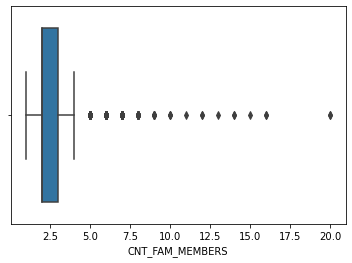

In [24]:
sns.boxplot(NewAppData['CNT_FAM_MEMBERS'])
plt.show()

In [25]:
values=round(NewAppData['CNT_FAM_MEMBERS'].median(),2)
print(values)
NewAppData['CNT_FAM_MEMBERS'] = NewAppData['CNT_FAM_MEMBERS'].fillna(NewAppData['CNT_FAM_MEMBERS']== "2.0")

2.0


# ANALYSING AND INSPECTING DATATYPES AND VALUES IN EACH COLUMN:

In [26]:
NewAppData.dtypes


SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                    object
AMT_GOODS_PRICE                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
CNT_FAM_MEMBERS                object
ORGANIZATION_TYPE              object
DAYS_LAST_PHONE_CHANGE        float64
dtype: object

On Inspecting the Dataframes,there are some incorrect datatypes and irregularities.We will further Analyse the following:
> CODE_GENDER
> AMT_ANNUITY
> AMT_INCOME_TOTAL
> AMT_CREDIT
> AMT_GOODS_PRICE
> ORGANIZATION_TYPE
> CNT_FAM_MEMBERS
> DAYS_BIRTH

CODE_GENDER

In [27]:
NewAppData['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since there just 4 records Lets Drop the XNA values from the dataset

In [28]:
NewAppData = NewAppData[~(NewAppData["CODE_GENDER"]=="XNA")]

AMT_ANNUITY

In [29]:
NewAppData['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5513
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13673, dtype: int64

Convertion of int to float

In [30]:

NewAppData.AMT_ANNUITY = NewAppData.AMT_ANNUITY.astype("float64")


AMT_GOODS_PRICE

In [31]:
NewAppData['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25280
675000.0     24962
900000.0     15415
270000.0     11428
             ...  
447606.0         1
2106000.0        1
894654.0         1
323982.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1003, dtype: int64

In [32]:
NewAppData.AMT_GOODS_PRICE = NewAppData.AMT_GOODS_PRICE.astype("float64")

ORGANIZATION_TYPE

In [33]:
NewAppData['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

High volume of records having XNA, Hence Drop XNA value from the Data set

In [34]:
NewAppData = NewAppData[~(NewAppData['ORGANIZATION_TYPE']== "XNA")]

CNT_FAM_MEMBERS

In [35]:
NewAppData['CNT_FAM_MEMBERS'].value_counts()

2.0      123328
3.0       51466
1.0       49049
4.0       24359
5.0        3417
6.0         396
7.0          78
8.0          19
9.0           6
10.0          3
False         2
14.0          2
12.0          2
20.0          2
13.0          1
15.0          1
16.0          1
11.0          1
Name: CNT_FAM_MEMBERS, dtype: int64

Lets Replace "False" with its Mode. Frequently occuring

In [36]:
values=NewAppData['CNT_FAM_MEMBERS'].mode()
values

0    2.0
dtype: object

In [37]:
NewAppData["CNT_FAM_MEMBERS"]=  NewAppData["CNT_FAM_MEMBERS"].apply(lambda x : str(x).replace("False", "3.0") if "False" in str(x) else str(x))
NewAppData['CNT_FAM_MEMBERS'] = pd.to_numeric(NewAppData['CNT_FAM_MEMBERS'])
NewAppData["CNT_FAM_MEMBERS"] = NewAppData["CNT_FAM_MEMBERS"].astype("int64")


BINING CONTINEOUS COLUMNS:

AMT_INCOME_TOTAL
AMT_CREDIT
DAYS_BIRTH

In [38]:
abs(NewAppData['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])


0.0     7489.0
0.1    10051.0
0.3    12365.0
0.6    15679.0
0.8    18267.6
1.0    25200.0
Name: DAYS_BIRTH, dtype: float64

In [39]:
NewAppData['AGE']=abs(NewAppData['DAYS_BIRTH'])//365.25


In [40]:
NewAppData['AGE_GROUP'] = pd.cut(NewAppData['AGE'],bins=np.arange(20,71,5))

DAYS_LAST_PHONE_CHANGE

In [41]:
NewAppData['DAYS_LAST_PHONE_CHANGE'] = NewAppData['DAYS_LAST_PHONE_CHANGE'].abs()

AMT_INCOME_TOTAL

In [42]:
labels_income = ['Very low income(0 - 2.5L)','Low income(2.5L - 5L)', 'Medium income(5L - 10L)', 'High income(10L - 20L)','Very High income(>20L)']
NewAppData['AMT_INCOME_TOTAL_BIN'] = pd.cut(NewAppData['AMT_INCOME_TOTAL'],[0, 250000, 500000, 1000000, 2000000, 117000000],
                                              labels = labels_income)

AMT_CREDIT
Binning AMT_CREDIT into 5 categories:
 Very low risk,
 Low risk,
 Medium ri,sk
 High risk,
 Very high risk

In [43]:
labels_credit = ['Very less credit(0 - 3L)', 'Less credit(3L - 6L)', 'Medium credit(6L - 15L)', 'High credit(15L - 30L)', 'Very high credit(>30L)']
NewAppData['AMT_CREDIT_BIN'] = pd.cut(NewAppData['AMT_CREDIT'], [0, 300000, 600000, 1500000, 3000000, 4050000], labels = labels_credit)


# UNIVARIATE ANALYSIS


In [44]:
#-CODE_GENDER
#-NAME_CONTRACT_TYPE
#-AMT_INCOME_TOTAL_BIN (Derived values after binning AMT_INCOME_TOTAL)
#-AMT_CREDIT_BIN (Derived values after binning AMT_CREDIT)
#-DAYS_LAST_PHONE_CHANGE_BIN (Derived values after binning DAYS_LAST_PHONE_CHANGE)
#-NAME_TYPE_SUITE
#-NAME_INCOME_TYPE
#-NAME_EDUCATION_TYPE
#-NAME_FAMILY_STATUS
#-NAME_HOUSING_TYPE
#-ORGANIZATION_TYPE

TARGET

0    0.913399
1    0.086601
Name: TARGET, dtype: float64


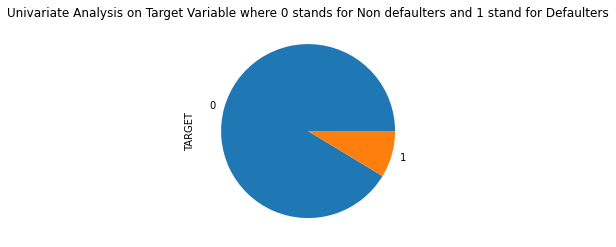

In [45]:
print(NewAppData.TARGET.value_counts(normalize=True))
plt.title("Univariate Analysis on Target Variable where 0 stands for Non defaulters and 1 stand for Defaulters")
NewAppData.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

91 % of the loan holders are Non Defauters. While 8% contribute the Defaulters

In [46]:
Non_defaulters= NewAppData.loc[NewAppData["TARGET"]==0]
Defaulters=NewAppData.loc[NewAppData["TARGET"]==1]

Splitting Dataframes into 2 : Defaulters and Non-Defaulters

DATA IMBALANCE

In [47]:
data_imbalance=round(len(Non_defaulters)/len(Defaulters),2)
data_imbalance

10.55

 Data Imbalance  is 10.55%

 1 CODE_GENDER

In [48]:
NewAppData.CODE_GENDER.value_counts()

F    157177
M     94956
Name: CODE_GENDER, dtype: int64

In [49]:
NewAppData.CODE_GENDER.value_counts(normalize =True)

F    0.623389
M    0.376611
Name: CODE_GENDER, dtype: float64

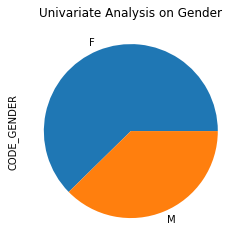

In [50]:
plt.title("Univariate Analysis on Gender")
NewAppData.CODE_GENDER.value_counts(normalize =True).plot.pie()
plt.show()

FLAG_OWN_CAR

In [51]:
NewAppData.FLAG_OWN_CAR.value_counts(normalize = True)

N    0.625531
Y    0.374469
Name: FLAG_OWN_CAR, dtype: float64

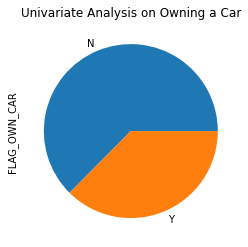

In [52]:
plt.title("Univariate Analysis on Owning a Car")
NewAppData.FLAG_OWN_CAR.value_counts(normalize =True).plot.pie()
plt.show()

FLAG_OWN_REALTY

In [53]:
NewAppData.FLAG_OWN_REALTY.value_counts(normalize = True)

Y    0.678523
N    0.321477
Name: FLAG_OWN_REALTY, dtype: float64

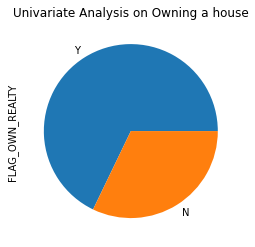

In [54]:
plt.title("Univariate Analysis on Owning a house")
NewAppData.FLAG_OWN_REALTY.value_counts(normalize =True).plot.pie()
plt.show()

CNT_CHILDREN

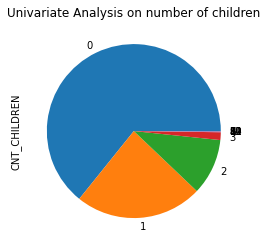

In [55]:

#print(NewAppData.CNT_CHILDREN.value_counts(normalize = True))
plt.title("Univariate Analysis on number of children")
NewAppData.CNT_CHILDREN.value_counts(normalize =True).plot.pie()
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

NAME_EDUCATION_TYPE

Secondary / secondary special    0.687272
Higher education                 0.264416
Incomplete higher                0.038694
Lower secondary                  0.009071
Academic degree                  0.000547
Name: NAME_EDUCATION_TYPE, dtype: float64


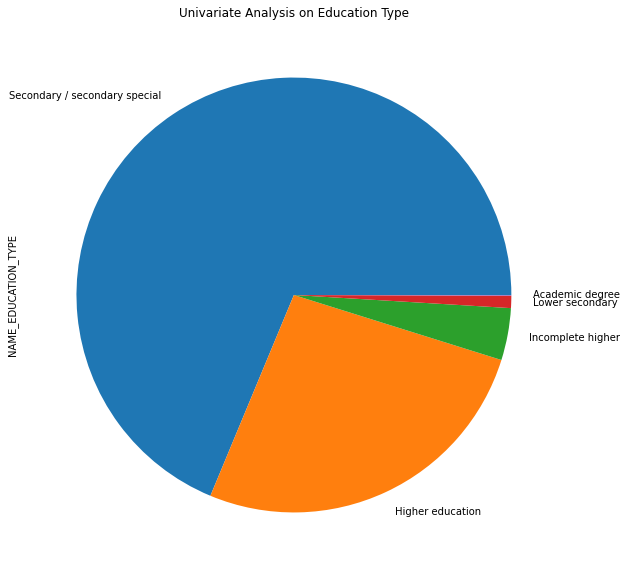

In [56]:
print(NewAppData.NAME_EDUCATION_TYPE.value_counts(normalize = True))
plt.title("Univariate Analysis on Education Type")
NewAppData.NAME_EDUCATION_TYPE.value_counts(normalize =True).plot.pie()
plt.show()

NAME_CONTRACT_TYPE

Cash loans         0.897241
Revolving loans    0.102759
Name: NAME_CONTRACT_TYPE, dtype: float64


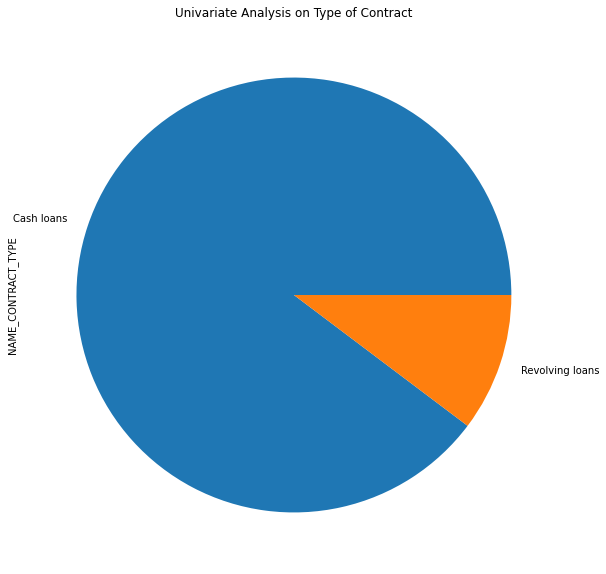

In [57]:
print(NewAppData.NAME_CONTRACT_TYPE.value_counts(normalize = True))
plt.title("Univariate Analysis on Type of Contract")
NewAppData.NAME_CONTRACT_TYPE.value_counts(normalize =True).plot.pie()
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

NAME_HOUSING_TYPE

House / apartment      0.874459
With parents           0.057989
Municipal apartment    0.035890
Rented apartment       0.018546
Office apartment       0.009126
Co-op apartment        0.003990
Name: NAME_HOUSING_TYPE, dtype: float64


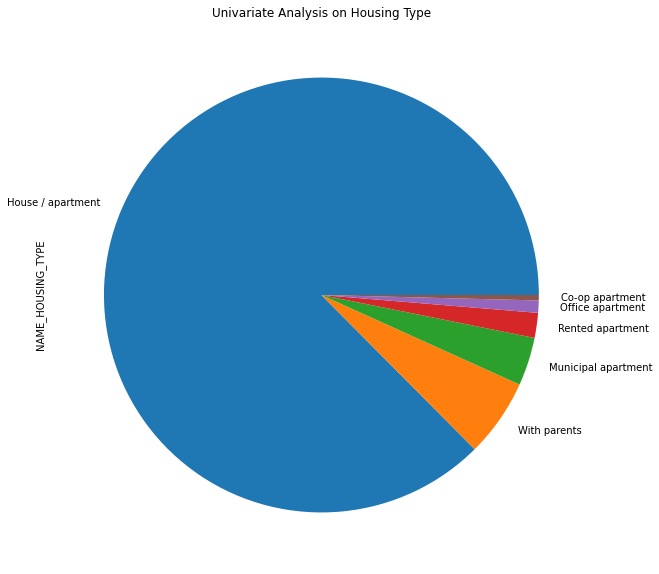

In [58]:
print(NewAppData.NAME_HOUSING_TYPE.value_counts(normalize = True))
plt.title("Univariate Analysis on Housing Type")
NewAppData.NAME_HOUSING_TYPE.value_counts(normalize =True).plot.pie()
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

ORGANIZATION_TYPE

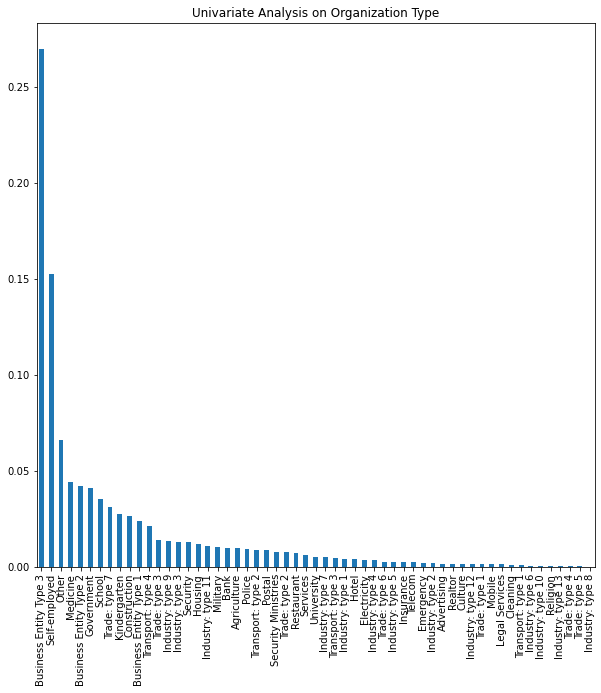

In [59]:
#print(NewAppData.ORGANIZATION_TYPE.value_counts(normalize = True))

plt.title("Univariate Analysis on Organization Type")
NewAppData.ORGANIZATION_TYPE.value_counts(normalize =True).plot.bar()
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()




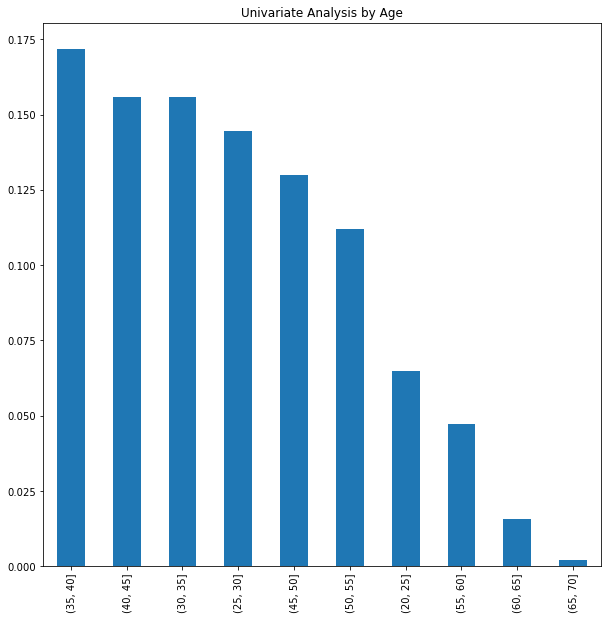

In [60]:
# 9 AGE_GROUP
plt.title("Univariate Analysis by Age")
NewAppData.AGE_GROUP.value_counts(normalize =True).plot.bar()
plt.show()

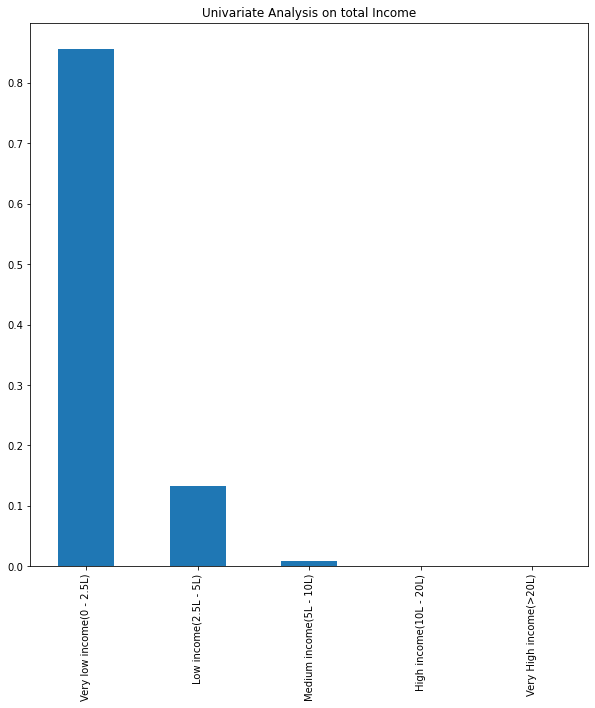

In [61]:
plt.title("Univariate Analysis on total Income")
NewAppData.AMT_INCOME_TOTAL_BIN.value_counts(normalize =True).plot.bar()
plt.show()

NAME_FAMILY_STATUS

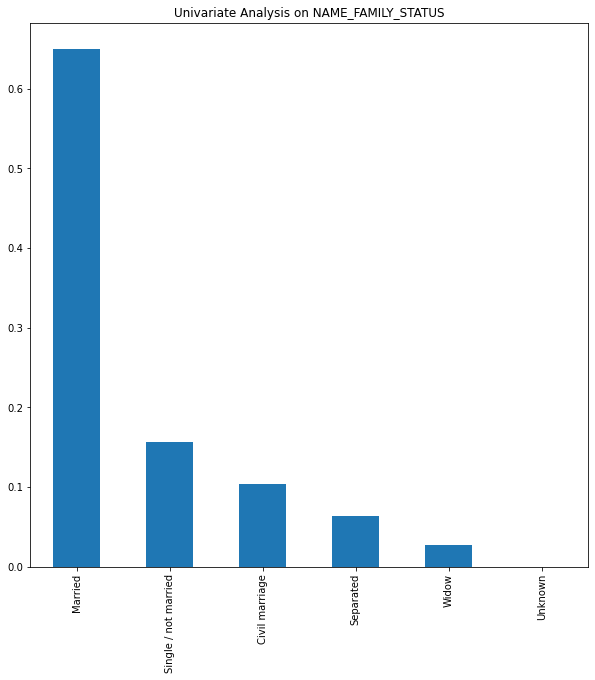

In [62]:
               
plt.title("Univariate Analysis on NAME_FAMILY_STATUS")
NewAppData.NAME_FAMILY_STATUS.value_counts(normalize =True).plot.bar()
plt.show()


From the above Analysis we conclude:
> Female applicants are more than male applicants
> 62% of the applicants do not own a car
> 68% of the applicants have their own House
> Out of all the applicants majority (64%)are Academic degree holders
> 89% of the loans are cash loans
> 87% of the applicants live in House/appartments
> There is no significant variable in Organization Type.

AMT_GOODS_PRICE

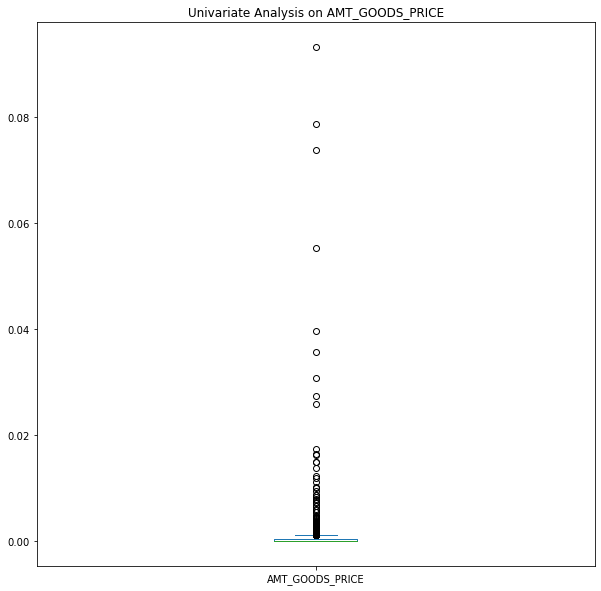

In [63]:
plt.title("Univariate Analysis on AMT_GOODS_PRICE")
NewAppData.AMT_GOODS_PRICE.value_counts(normalize =True).plot.box()
plt.show()

# BIVARIATE ANALYSIS

1AMT_INCOME_TOTAL_BIN and AMT_CREDIT

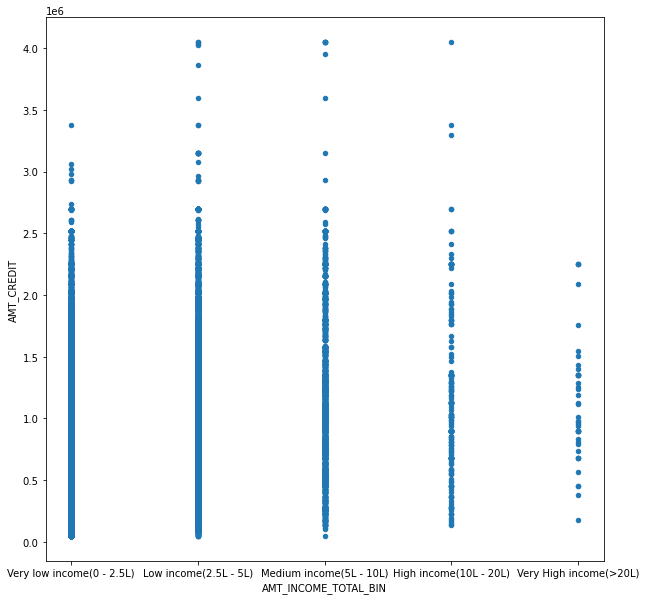

In [64]:
NewAppData.plot.scatter(x = "AMT_INCOME_TOTAL_BIN", y ="AMT_CREDIT")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

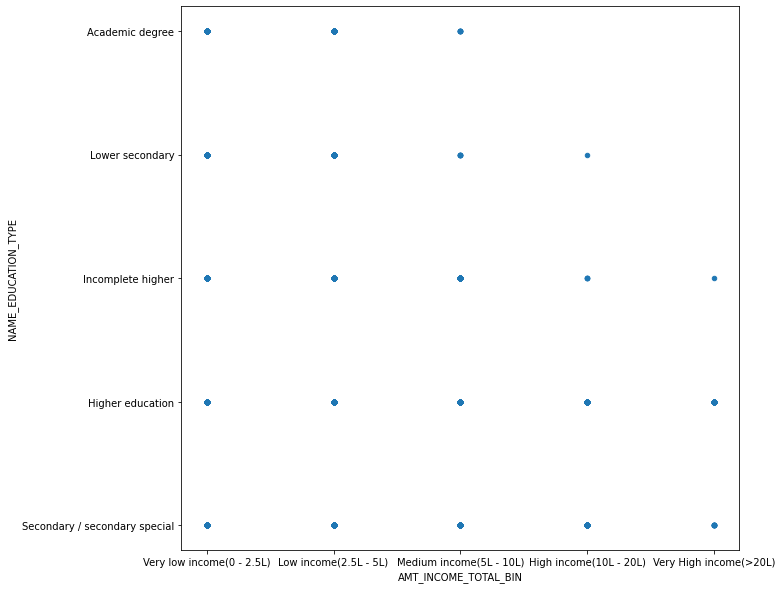

In [65]:
NewAppData.plot.scatter(x = "AMT_INCOME_TOTAL_BIN", y ="NAME_EDUCATION_TYPE")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

NAME_EDUCATION_TYPE and AMT_CREDIT

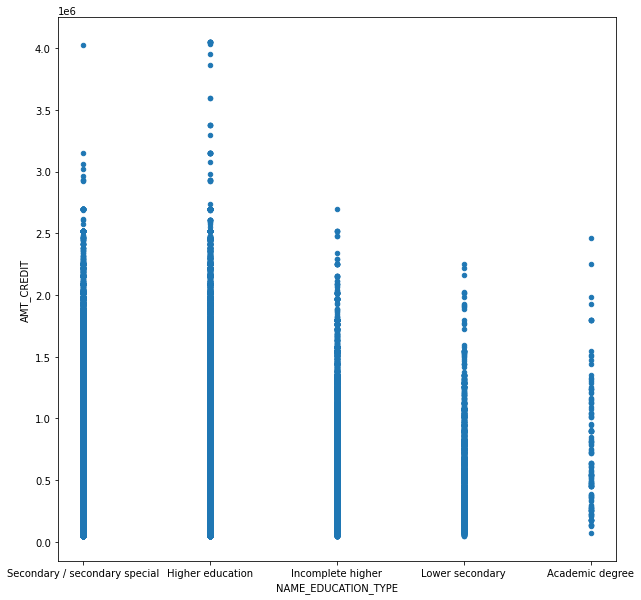

In [66]:
NewAppData.plot.scatter(x = "NAME_EDUCATION_TYPE", y = "AMT_CREDIT")
plt.show()

NAME_CONTRACT_TYPE and AMT_CREDIT

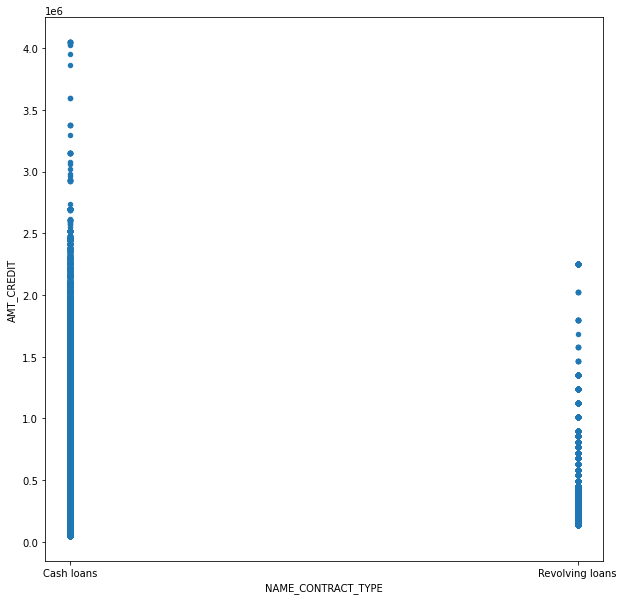

In [67]:
NewAppData.plot.scatter(x = "NAME_CONTRACT_TYPE", y ="AMT_CREDIT")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

NAME_HOUSING_TYPE  and AMT_CREDIT

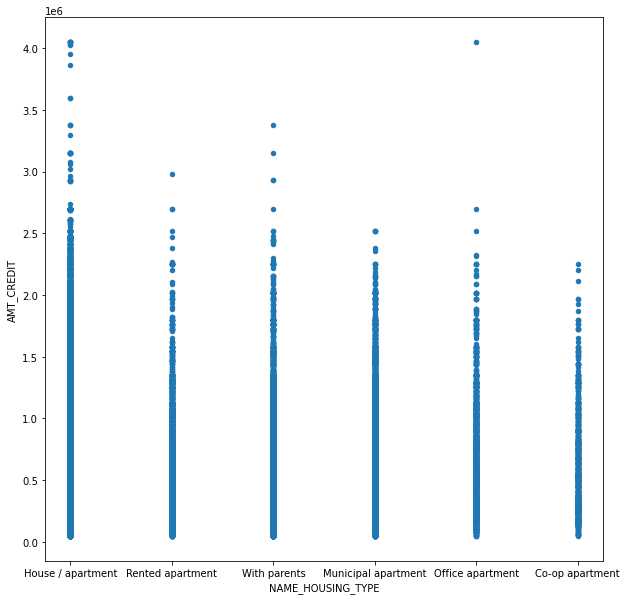

In [68]:
NewAppData.plot.scatter(x = "NAME_HOUSING_TYPE", y = "AMT_CREDIT")
plt.show()

We Conclude:
- Low Income and Medium Income Apply for Heigher loans
- People with higher education apply for more loans


Observations:
- It can be observed that businessmen do not find it difficult to repay loans(Both males and females)
- Females on maternity leaves find it difficult to repay loans.
- Unemployed males and females find it difficult to repay loans

# SEGMENTED UNIVARIATE ANALYSIS

CODE_GENDER

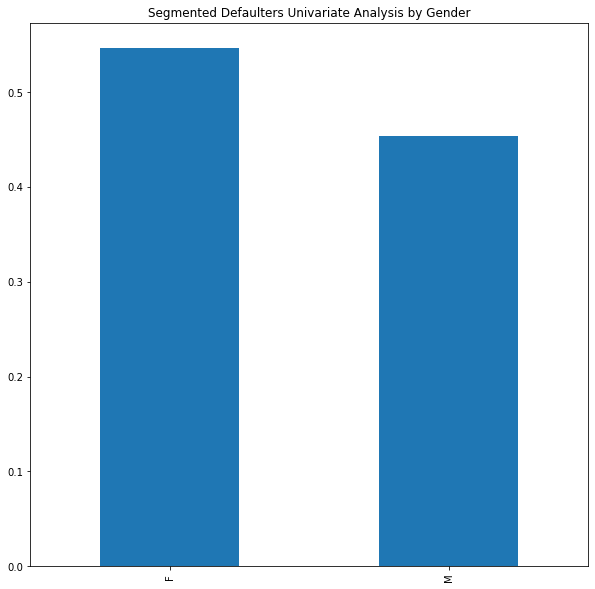

In [69]:
plt.title("Segmented Defaulters Univariate Analysis by Gender")
Defaulters.CODE_GENDER.value_counts(normalize =True).plot.bar()
plt.show()

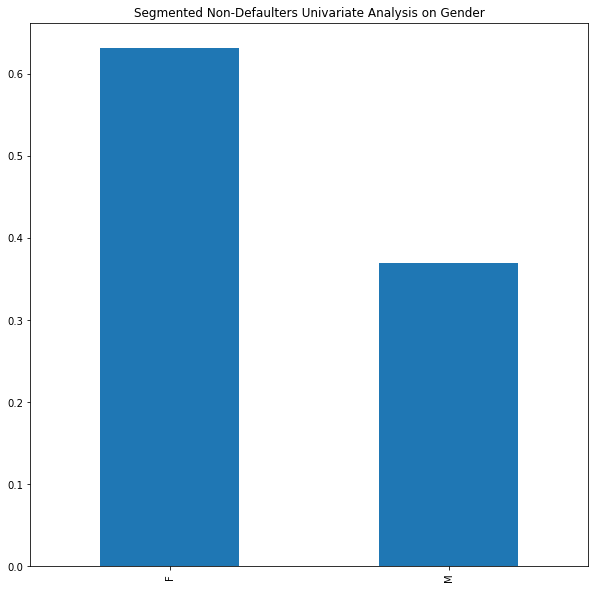

In [70]:
plt.title("Segmented Non-Defaulters Univariate Analysis on Gender")
Non_defaulters.CODE_GENDER.value_counts(normalize =True).plot.bar()
plt.show()

FLAG_OWN_CAR

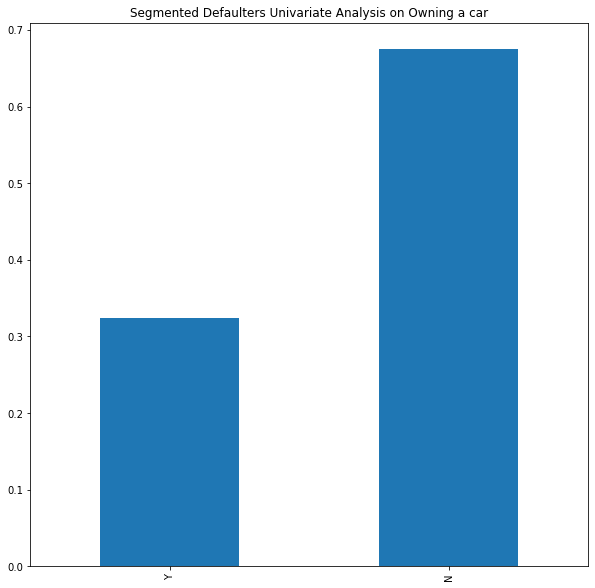

In [71]:
plt.title("Segmented Defaulters Univariate Analysis on Owning a car")
Defaulters.FLAG_OWN_CAR.value_counts(normalize =True, ascending = True).plot.bar()
plt.show()

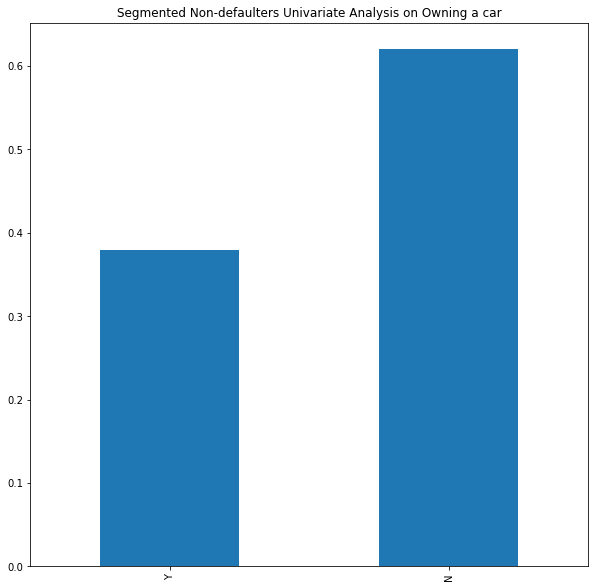

In [72]:
plt.title("Segmented Non-defaulters Univariate Analysis on Owning a car")
Non_defaulters.FLAG_OWN_CAR.value_counts(normalize =True, ascending = True).plot.bar()
plt.show()

From the above Analysis we can say that the rate of default of people owning car is less that the applicants who don't.


NAME_INCOME_TYPE

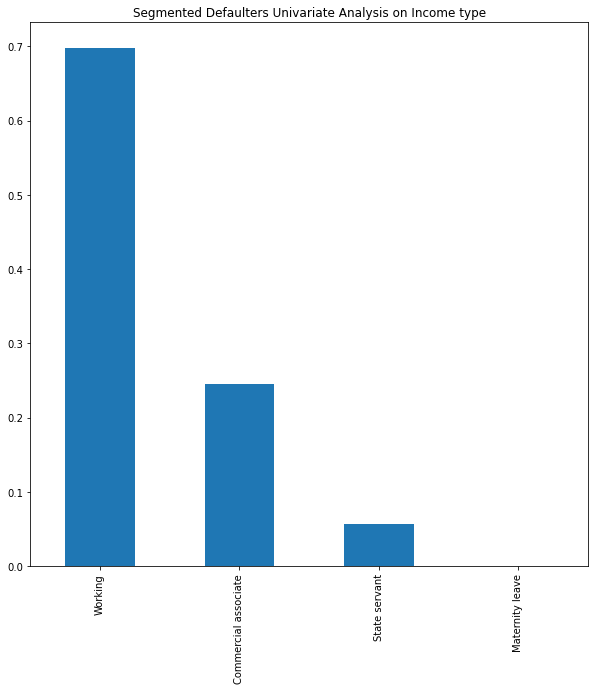

In [73]:

plt.title("Segmented Defaulters Univariate Analysis on Income type")
Defaulters.NAME_INCOME_TYPE.value_counts(normalize =True).plot.bar()

plt.show()

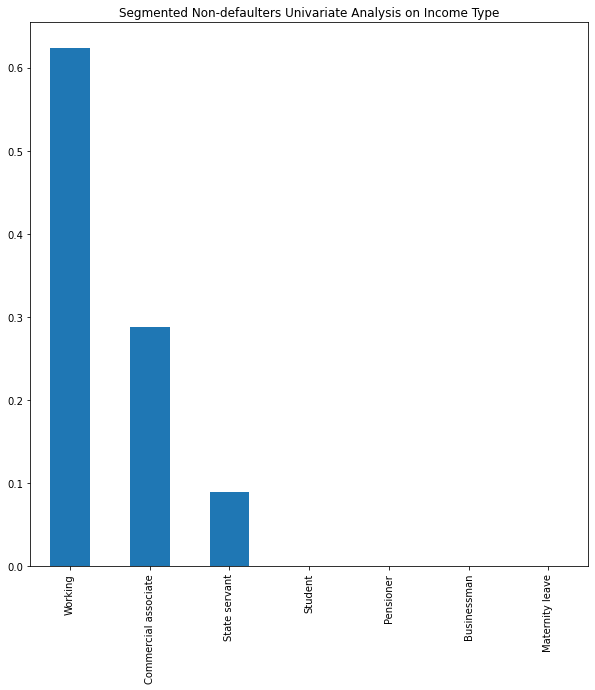

In [74]:
plt.title("Segmented Non-defaulters Univariate Analysis on Income Type")
Non_defaulters.NAME_INCOME_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

#> From the above analysis we can say that Students and Business men do not Default
#> Working class contibute to maximum number of loan applicants.
#> Hence Working class have more chances to default.

NAME_HOUSING_TYPE

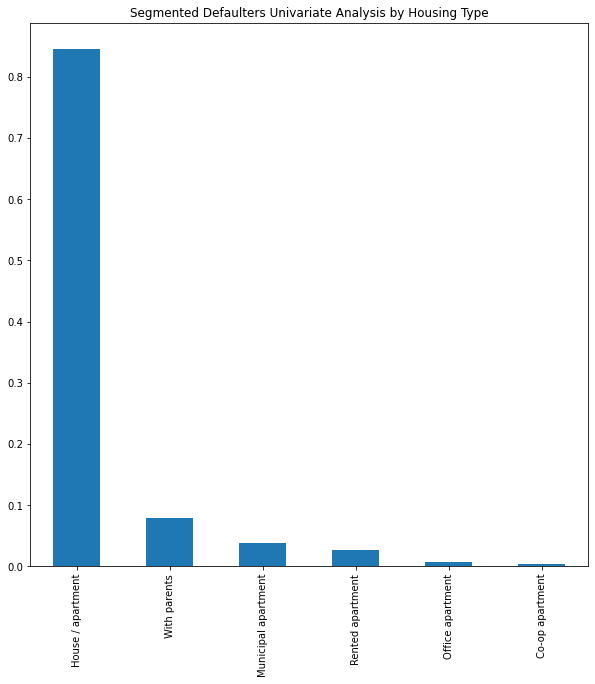

In [75]:
plt.title("Segmented Defaulters Univariate Analysis by Housing Type")
Defaulters.NAME_HOUSING_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

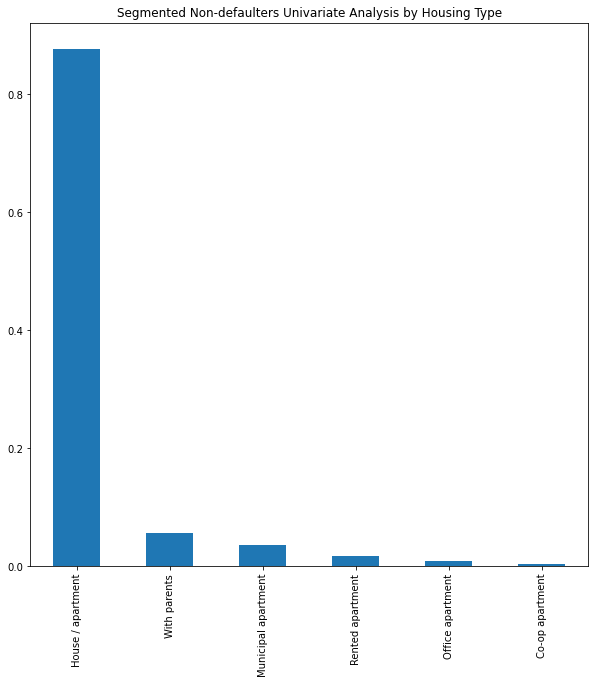

In [76]:
plt.title("Segmented Non-defaulters Univariate Analysis by Housing Type")
Non_defaulters.NAME_HOUSING_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

From the above we know that applicants living in House/Appartments apply for more loans.
#> Next highest defaulter group are the one living with their parents.

AGE_GROUP

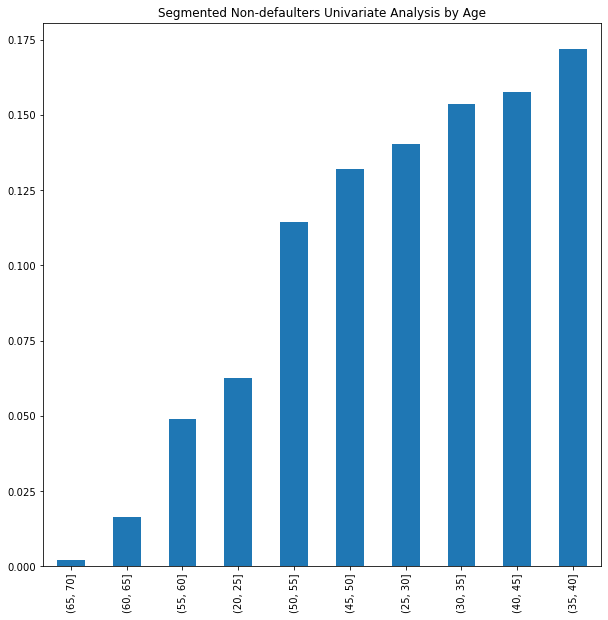

In [77]:
plt.title("Segmented Non-defaulters Univariate Analysis by Age")
Non_defaulters.AGE_GROUP.value_counts(normalize =True, ascending = True).plot.bar()
plt.show()

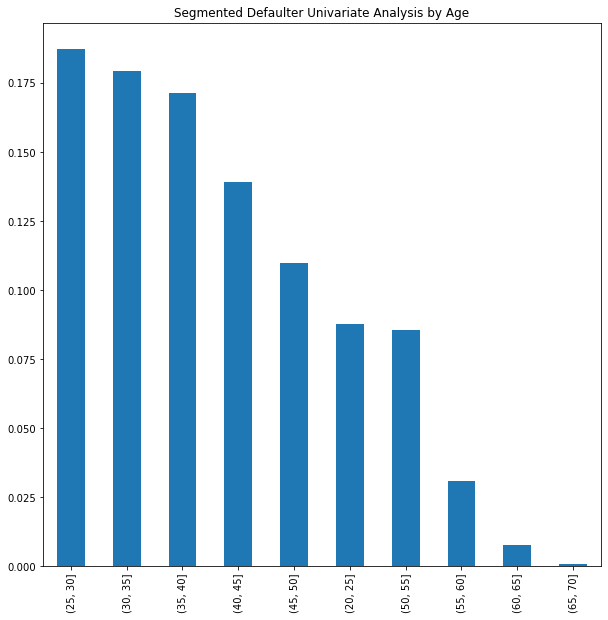

In [78]:
plt.title("Segmented Defaulter Univariate Analysis by Age")
Defaulters.AGE_GROUP.value_counts(normalize =True).plot.bar()
plt.show()

Majority of the defaulters are in the Age range(25-30)

NAME_CONTRACT_TYPE

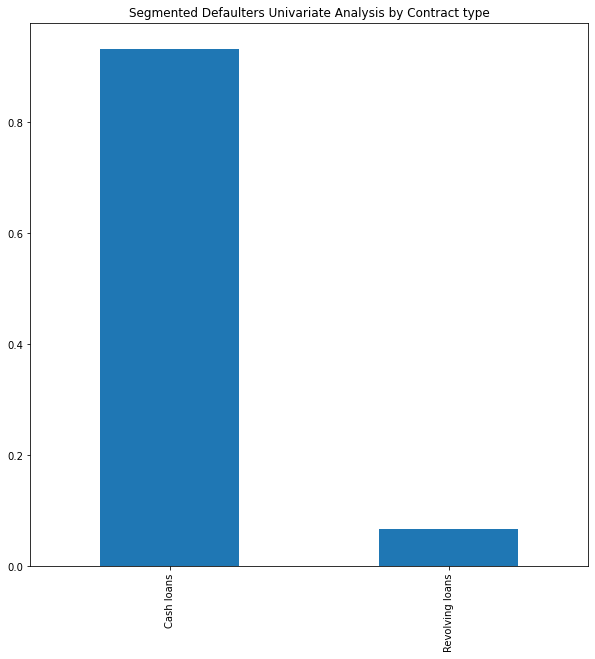

In [79]:
plt.title("Segmented Defaulters Univariate Analysis by Contract type")
Defaulters.NAME_CONTRACT_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

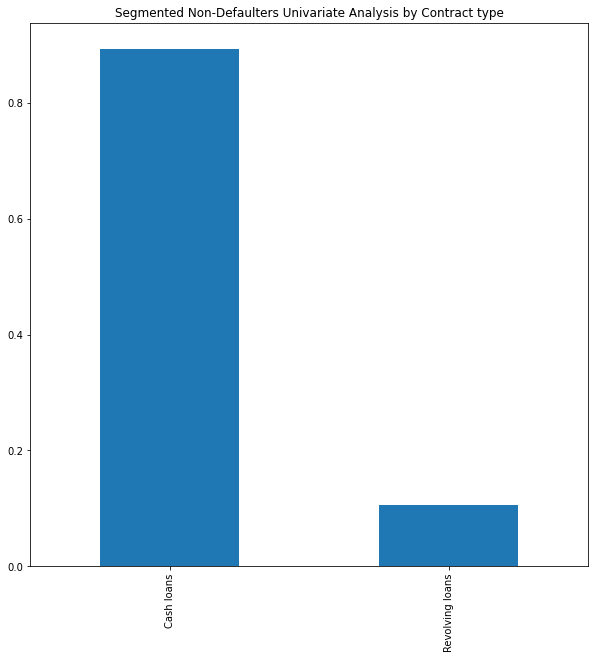

In [80]:
plt.title("Segmented Non-Defaulters Univariate Analysis by Contract type")
Non_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

NAME_EDUCATION_TYPE

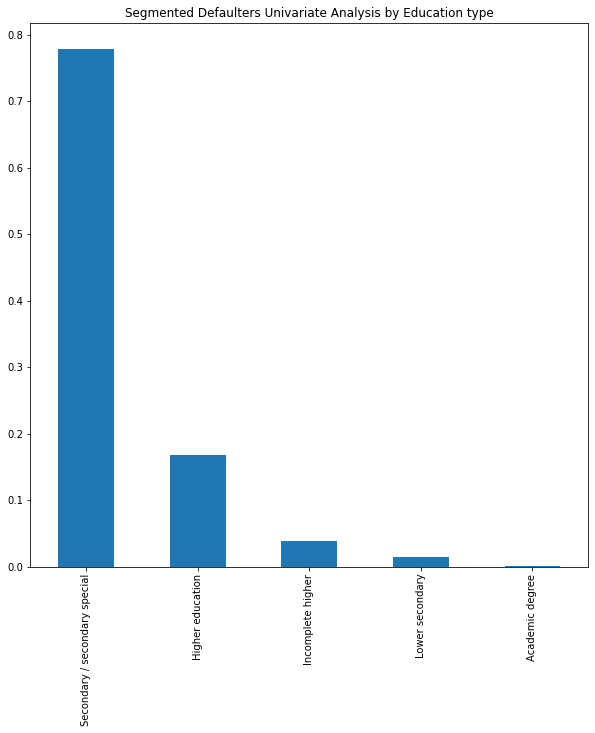

In [81]:

plt.title("Segmented Defaulters Univariate Analysis by Education type")
Defaulters.NAME_EDUCATION_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

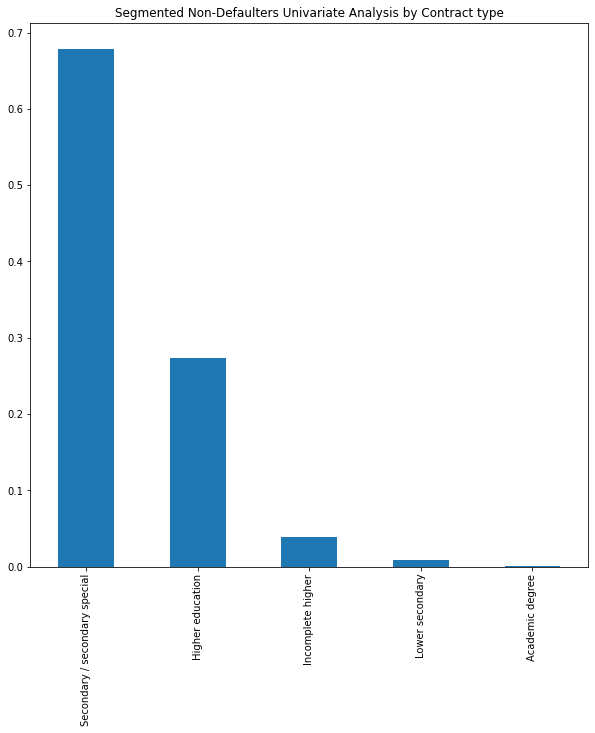

In [82]:
plt.title("Segmented Non-Defaulters Univariate Analysis by Contract type")
Non_defaulters.NAME_EDUCATION_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

# CORRELATION

In [83]:

NewAppData.corr()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AGE
SK_ID_CURR,1.000000,-0.001412,-0.001027,-0.002353,-0.000610,-0.001579,-0.000410,0.000540,-0.001454,-0.000101,0.000506,-0.000118,-0.001672,-0.000219,0.001343
TARGET,-0.001412,1.000000,0.007743,-0.007331,-0.040662,-0.020013,-0.050201,-0.040637,0.065758,0.074957,0.036089,0.039910,-0.001823,-0.060289,-0.065711
CNT_CHILDREN,-0.001027,0.007743,1.000000,-0.003539,-0.017714,-0.005935,-0.021590,-0.030730,0.236753,0.061139,0.159937,-0.114873,0.893273,0.000812,-0.236688
AMT_INCOME_TOTAL,-0.002353,-0.007331,-0.003539,1.000000,0.143098,0.175365,0.146033,0.072045,-0.021070,-0.013003,0.012853,-0.013416,-0.000241,0.014688,0.021039
AMT_CREDIT,-0.000610,-0.040662,-0.017714,0.143098,1.000000,0.761237,0.986135,0.103180,-0.157406,-0.091304,-0.017883,-0.038462,0.037415,0.075185,0.157399
AMT_ANNUITY,-0.001579,-0.020013,-0.005935,0.175365,0.761237,1.000000,0.765712,0.119800,-0.092537,-0.053613,0.009410,-0.028085,0.042285,0.063445,0.092469
AMT_GOODS_PRICE,-0.000410,-0.050201,-0.021590,0.146033,0.986135,0.765712,1.000000,0.107052,-0.152500,-0.093322,-0.014999,-0.040593,0.035375,0.077968,0.152485
REGION_POPULATION_RELATIVE,0.000540,-0.040637,-0.030730,0.072045,0.103180,0.119800,0.107052,1.000000,-0.044305,0.004152,-0.060780,-0.006212,-0.028832,0.046430,0.044328
DAYS_BIRTH,-0.001454,0.065758,0.236753,-0.021070,-0.157406,-0.092537,-0.152500,-0.044305,1.000000,0.352311,0.295919,0.112627,0.171636,-0.140894,-0.999591
DAYS_EMPLOYED,-0.000101,0.074957,0.061139,-0.013003,-0.091304,-0.053613,-0.093322,0.004152,0.352311,1.000000,0.171735,0.089862,0.028873,-0.141702,-0.352072


Since with so many numbers its hard to determine the correlation and hence we will create a Correlation Heatmap Matrix

CORRELATION HEAT MAP


<AxesSubplot:>

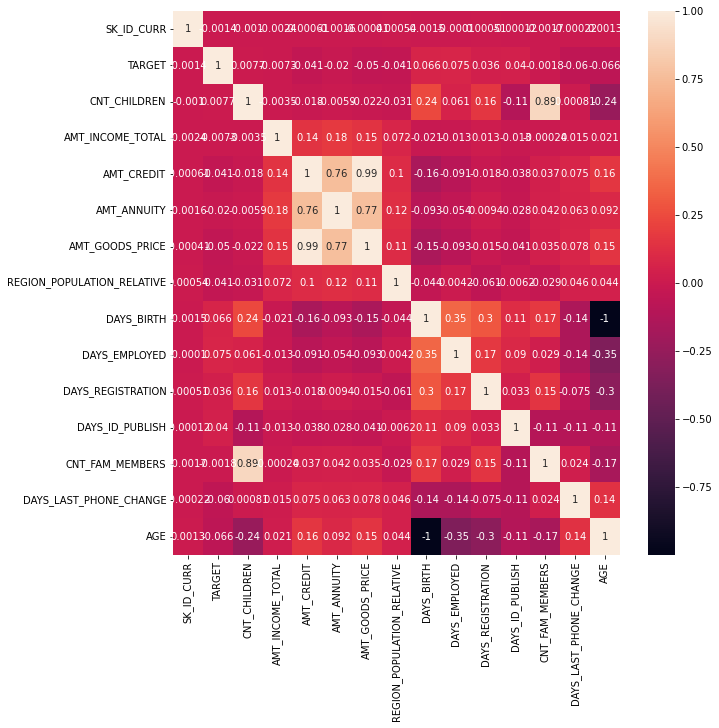

In [84]:

sns.heatmap(NewAppData.corr(),annot =True)


COLLERATION METRIX(DEFAULTERS)

<AxesSubplot:>

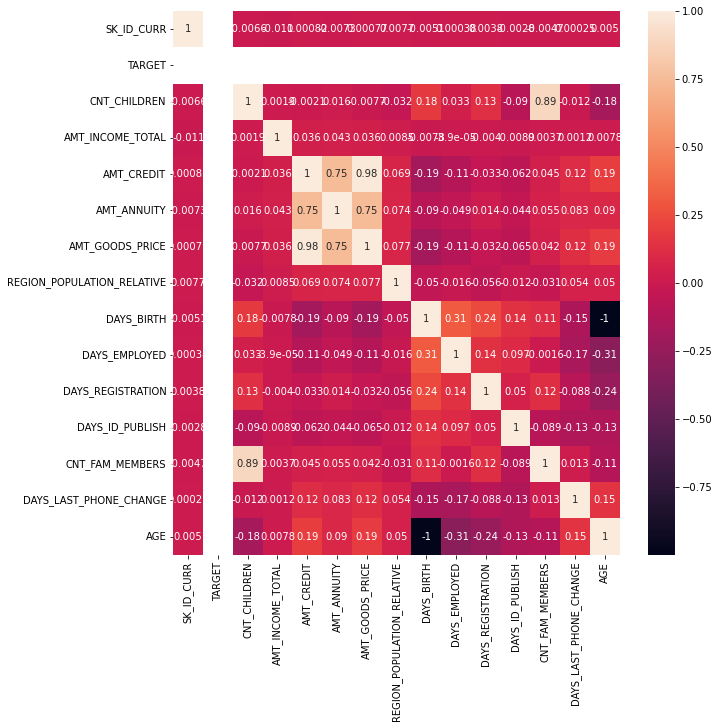

In [85]:
sns.heatmap(Defaulters.corr(),annot =True)

# TOP 10 CORRELATED VARIABLES

In [86]:
corr=Defaulters.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.982536
182,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893829
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.749591
79,AMT_ANNUITY,AMT_CREDIT,0.748708
143,DAYS_EMPLOYED,DAYS_BIRTH,0.307018
158,DAYS_REGISTRATION,DAYS_BIRTH,0.241202
214,AGE,AMT_CREDIT,0.189389
216,AGE,AMT_GOODS_PRICE,0.185020
122,DAYS_BIRTH,CNT_CHILDREN,0.176563
223,AGE,DAYS_LAST_PHONE_CHANGE,0.147100


# PreAppData ANALYSIS

In [87]:
PreAppData.shape

(1670214, 37)

In [88]:
PreAppData.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

# HANDLING MISSING VALUES

Lets drop all the columns containing more than 30% of missing values

In [89]:
PreAppData = PreAppData.drop(PreAppData.columns[PreAppData.isnull().mean() >= 0.3], axis = 1)

In [90]:
PreAppData.shape

(1670214, 26)

In [91]:
PreAppData.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

Fix the Missing values for the above data

AMT_ANNUITY

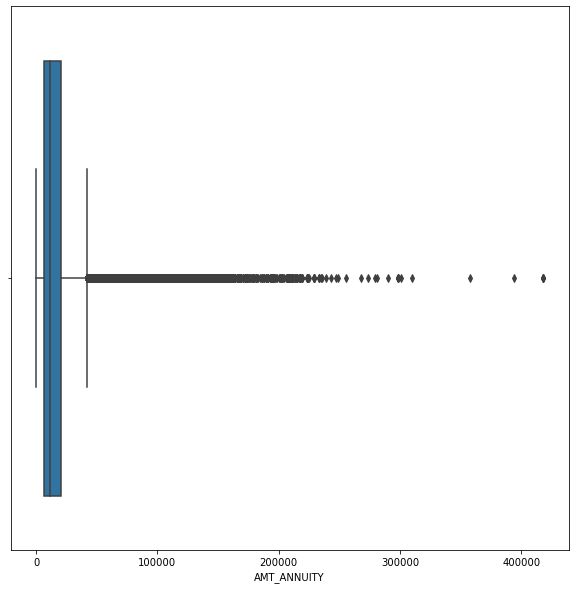

In [92]:
sns.boxplot(PreAppData['AMT_ANNUITY'])
plt.show()

In [93]:
values=round(PreAppData['AMT_ANNUITY'].median(),2)
values

11250.0

In [94]:
PreAppData['AMT_ANNUITY'] = PreAppData['AMT_ANNUITY'].fillna(PreAppData['AMT_ANNUITY']== "8250.25")

AMT_GOODS_PRICE 

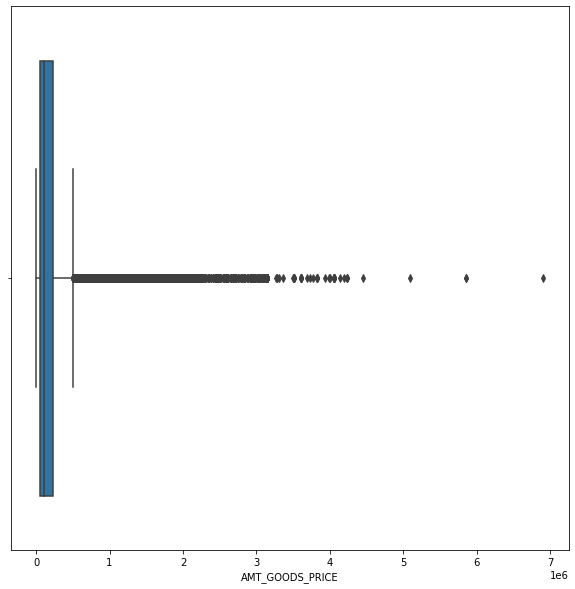

In [95]:
 
sns.boxplot(PreAppData['AMT_GOODS_PRICE'])
plt.show()

In [96]:
values=round(PreAppData['AMT_GOODS_PRICE'].median(),2)
values

112320.0

In [97]:
PreAppData['AMT_GOODS_PRICE'] = PreAppData['AMT_GOODS_PRICE'].fillna(PreAppData['AMT_GOODS_PRICE']== "112320.0")



CNT_PAYMENT



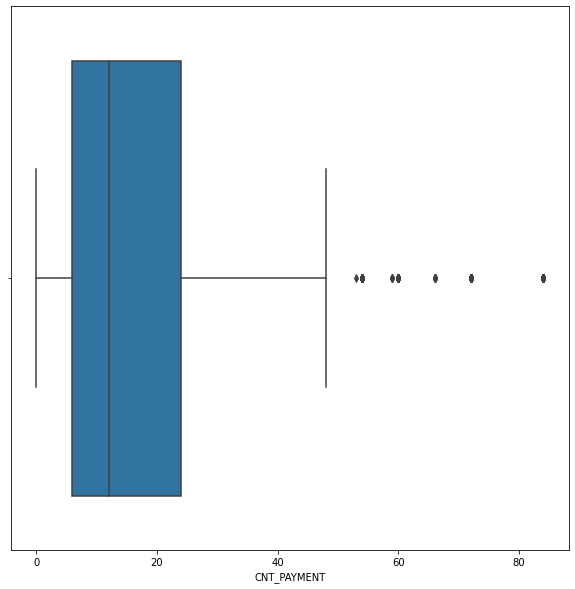

In [98]:
sns.boxplot(PreAppData['CNT_PAYMENT'])
plt.show()

In [99]:
values=round(PreAppData['CNT_PAYMENT'].median(),2)
values

12.0

In [100]:
PreAppData['CNT_PAYMENT'] = PreAppData['CNT_PAYMENT'].fillna(PreAppData['CNT_PAYMENT']== "12.0")



PRODUCT_COMBINATION

In [101]:
PreAppData['PRODUCT_COMBINATION'].value_counts()


Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [102]:
values=PreAppData['PRODUCT_COMBINATION'].mode()
values

0    Cash
dtype: object

In [103]:
PreAppData['PRODUCT_COMBINATION'] = PreAppData['PRODUCT_COMBINATION'].fillna(PreAppData['PRODUCT_COMBINATION']== "Cash")

AMT_CREDIT

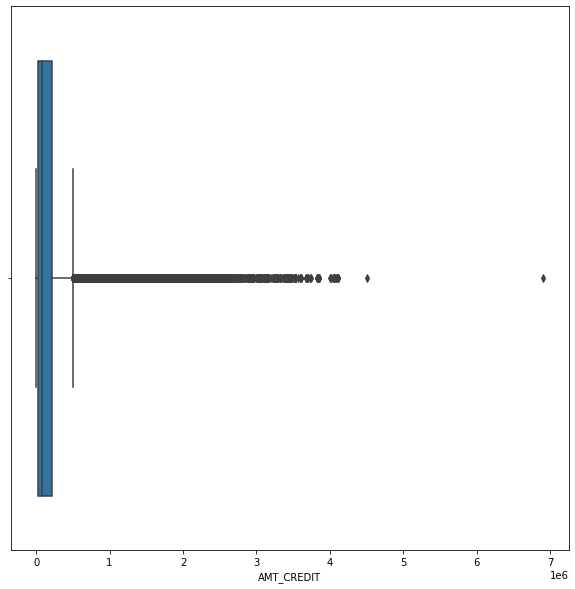

In [104]:
sns.boxplot(PreAppData['AMT_CREDIT'])
plt.show()

In [105]:
values=round(PreAppData['AMT_CREDIT'].median(),2)
values

80541.0

In [106]:
PreAppData['AMT_CREDIT'] = PreAppData['AMT_CREDIT'].fillna(PreAppData['AMT_CREDIT']== "80541.0")


# Handling DataTypes and Other Anomalies

In [107]:
PreAppData.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                     object
AMT_APPLICATION                float64
AMT_CREDIT                      object
AMT_GOODS_PRICE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                     object
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

NAME_CONTRACT_TYPE

In [108]:
PreAppData["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [109]:
PreAppData = PreAppData[~(PreAppData['NAME_CONTRACT_TYPE']== "XNA")]


AMT_ANNUITY

In [110]:
PreAppData["AMT_ANNUITY"].value_counts()

False        373526
2250.0        31865
11250.0       13974
6750.0        13442
9000.0        12496
              ...  
3794.445          1
8723.16           1
27948.33          1
25374.285         1
14704.29          1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [111]:
values=PreAppData['AMT_ANNUITY'].median()
values

8254.0125

In [112]:
PreAppData["AMT_ANNUITY"]=  PreAppData["AMT_ANNUITY"].apply(lambda x : str(x).replace("False", "8254.0") if "False" in str(x) else str(x))

PreAppData['AMT_ANNUITY'] = pd.to_numeric(PreAppData['AMT_ANNUITY'])

PreAppData["AMT_ANNUITY"] = PreAppData["AMT_ANNUITY"].astype("float64")

AMT_CREDIT

In [113]:
PreAppData["AMT_CREDIT"].value_counts()

0.00         336423
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [114]:
PreAppData["AMT_CREDIT"] = PreAppData["AMT_CREDIT"].astype("float64")

AMT_GOODS_PRICE

In [115]:
PreAppData["AMT_GOODS_PRICE"].value_counts()

False        392038
45000.0       47831
225000.0      43549
135000.0      40666
450000.0      38926
              ...  
185292.0          1
225054.0          1
156212.55         1
99896.31          1
267295.5          1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [116]:
values=PreAppData['AMT_GOODS_PRICE'].median()
values

71055.0

In [117]:
PreAppData["AMT_GOODS_PRICE"]=  PreAppData["AMT_GOODS_PRICE"].apply(lambda x : str(x).replace("False", "71055.0") if "False" in str(x) else str(x))

PreAppData['AMT_GOODS_PRICE'] = pd.to_numeric(PreAppData['AMT_GOODS_PRICE'])

PreAppData["AMT_GOODS_PRICE"] = PreAppData["AMT_GOODS_PRICE"].astype("float64")

CODE_REJECT_REASON

In [118]:
PreAppData["CODE_REJECT_REASON"].value_counts()

XAP       1352778
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [119]:
PreAppData = PreAppData[~(PreAppData['CODE_REJECT_REASON']== "XNA")]

CNT_PAYMENT

In [120]:
 PreAppData["CNT_PAYMENT"].value_counts()

False    513612
12.0     322807
6.0      190377
10.0     141755
24.0     137531
18.0      77334
36.0      72284
60.0      53015
48.0      47027
8.0       30341
4.0       26920
30.0      16907
14.0       8250
42.0       7124
16.0       5709
5.0        3957
54.0       2097
20.0       1805
7.0        1434
9.0        1234
3.0        1100
15.0        904
11.0        669
72.0        139
13.0         51
17.0         48
84.0         40
22.0         37
23.0         27
26.0         13
35.0         11
66.0         10
28.0          8
29.0          8
19.0          6
32.0          6
59.0          4
41.0          3
47.0          3
45.0          3
21.0          3
44.0          2
39.0          2
46.0          2
38.0          2
34.0          2
40.0          1
33.0          1
53.0          1
Name: CNT_PAYMENT, dtype: int64

In [121]:
values=PreAppData['CNT_PAYMENT'].median()
values

10.0

In [122]:
PreAppData["CNT_PAYMENT"]=  PreAppData["CNT_PAYMENT"].apply(lambda x : str(x).replace("False", "10.0") if "False" in str(x) else str(x))

PreAppData['CNT_PAYMENT'] = pd.to_numeric(PreAppData['CNT_PAYMENT'])

PreAppData["CNT_PAYMENT"] = PreAppData["CNT_PAYMENT"].astype("float64")

# UNIVARIATE ANALYSIS

CODE_REJECT_REASON

XAP       0.812662
HC        0.105250
LIMIT     0.033449
SCO       0.022508
CLIENT    0.015881
SCOFR     0.007696
VERIF     0.002124
SYSTEM    0.000431
Name: CODE_REJECT_REASON, dtype: float64


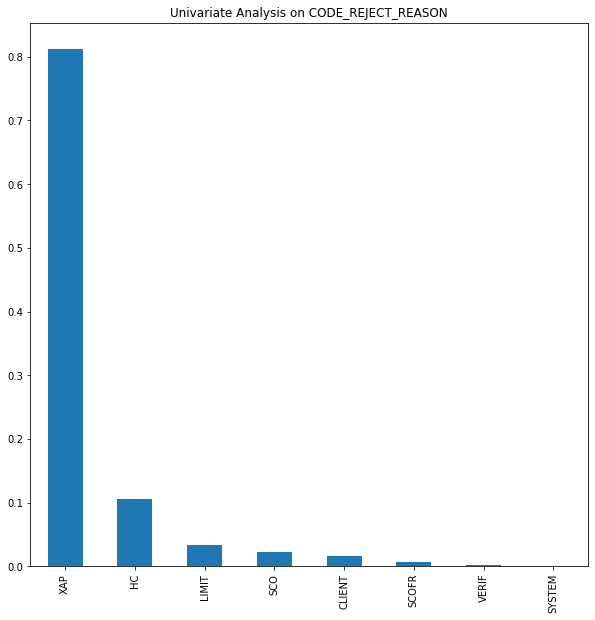

In [123]:
print(PreAppData.CODE_REJECT_REASON.value_counts(normalize = True))
plt.title("Univariate Analysis on CODE_REJECT_REASON")
PreAppData.CODE_REJECT_REASON.value_counts(normalize =True).plot.bar()
plt.show()

NAME_CASH_LOAN_PURPOSE

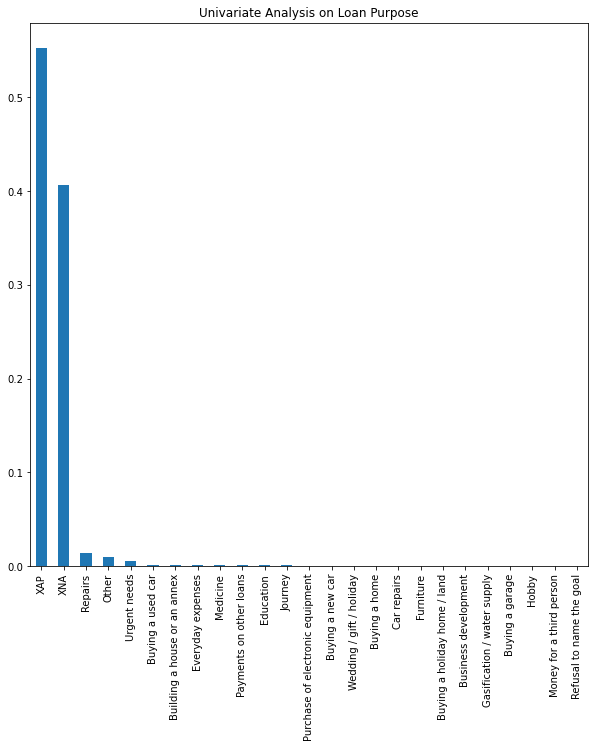

In [124]:
plt.title("Univariate Analysis on Loan Purpose")
PreAppData.NAME_CASH_LOAN_PURPOSE.value_counts(normalize =True).plot.bar()
plt.show()

XNA VALUES NEED TO BE TREATED/Handled

NAME_CONTRACT_TYPE

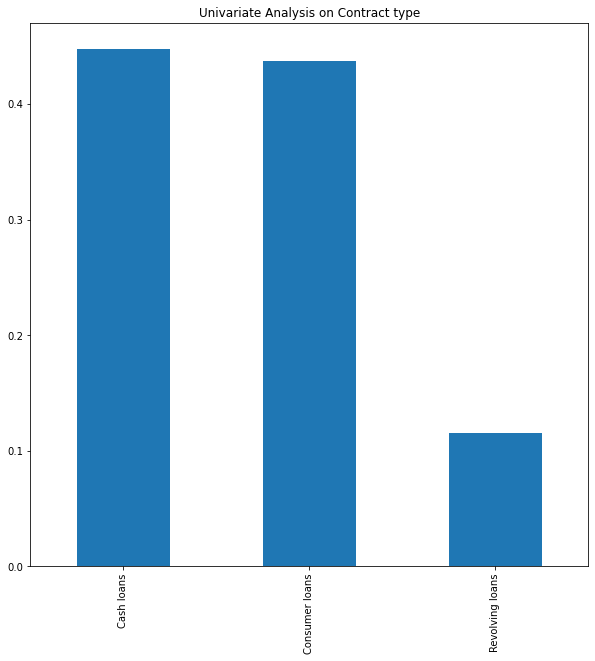

In [125]:
plt.title("Univariate Analysis on Contract type")
PreAppData.NAME_CONTRACT_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

NAME_CLIENT_TYPE

Repeater     0.736694
New          0.180848
Refreshed    0.081295
XNA          0.001163
Name: NAME_CLIENT_TYPE, dtype: float64


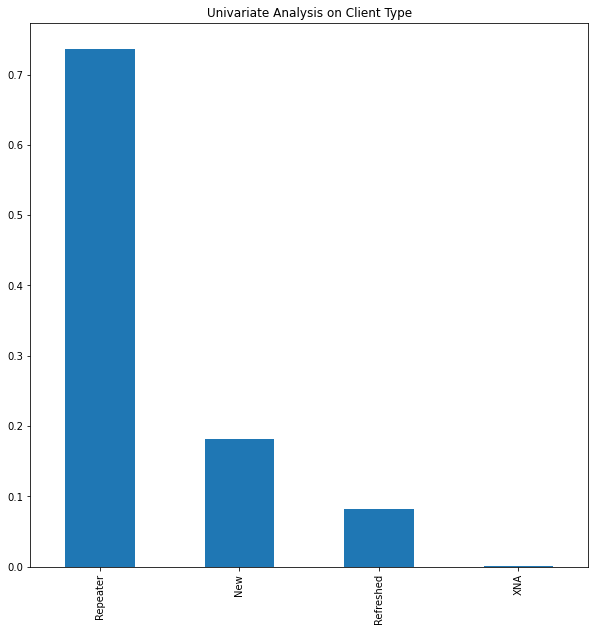

In [126]:
print(PreAppData.NAME_CLIENT_TYPE.value_counts(normalize = True))

plt.title("Univariate Analysis on Client Type")
PreAppData.NAME_CLIENT_TYPE.value_counts(normalize =True).plot.bar()
plt.show()

NOTE XNA VALUES NEED TO BE Treated

73 % of the of the applications are from Repeates.

NAME_CONTRACT_STATUS

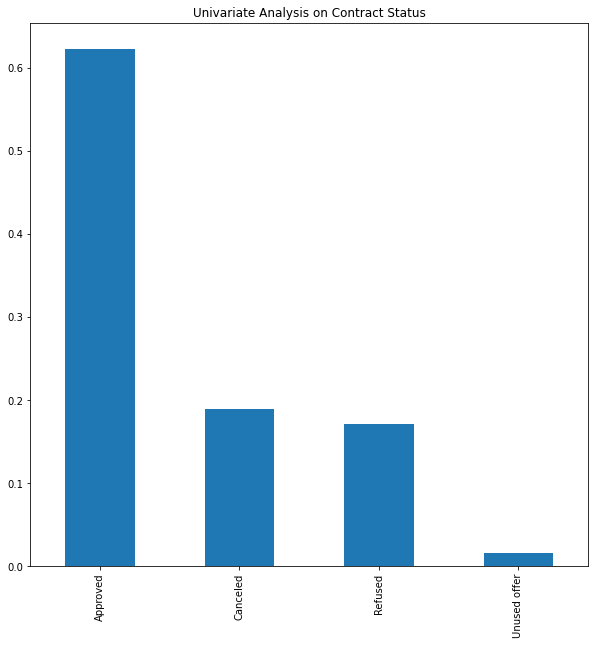

In [127]:
plt.title("Univariate Analysis on Contract Status")
PreAppData.NAME_CONTRACT_STATUS.value_counts(normalize =True).plot.bar()
plt.show()

In [128]:
PreAppData.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# BIVARAIAT ANALYSIS

CODE_REJECT_REASON and NAME_CONTRACT_STATUS

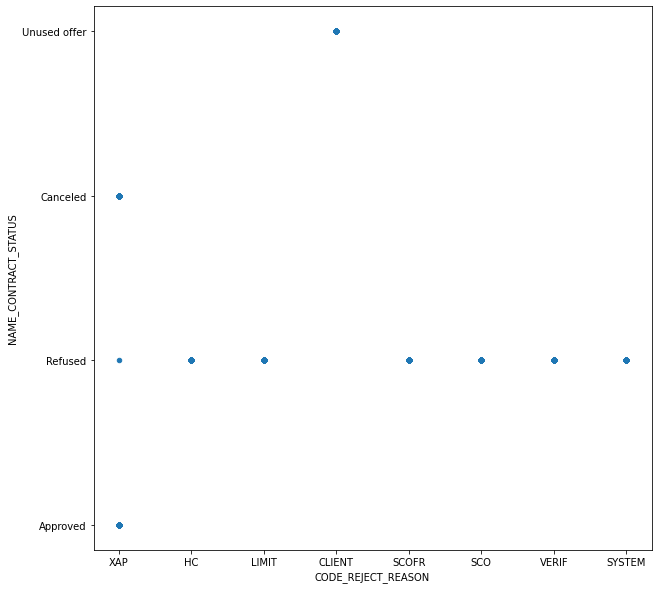

In [129]:
PreAppData.plot.scatter(x = "CODE_REJECT_REASON", y ="NAME_CONTRACT_STATUS")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


The rejection reason for most non approved loans in unknown.


NAME_CLIENT_TYPE and NAME_CONTRACT_STATUS

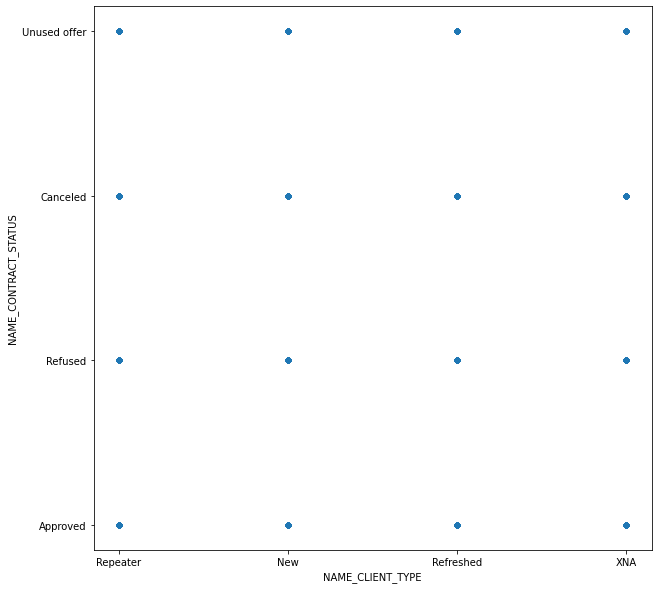

In [130]:
PreAppData.plot.scatter(x = "NAME_CLIENT_TYPE", y ="NAME_CONTRACT_STATUS")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

NAME_PRODUCT_TYPE and NAME_CONTRACT_STATUS

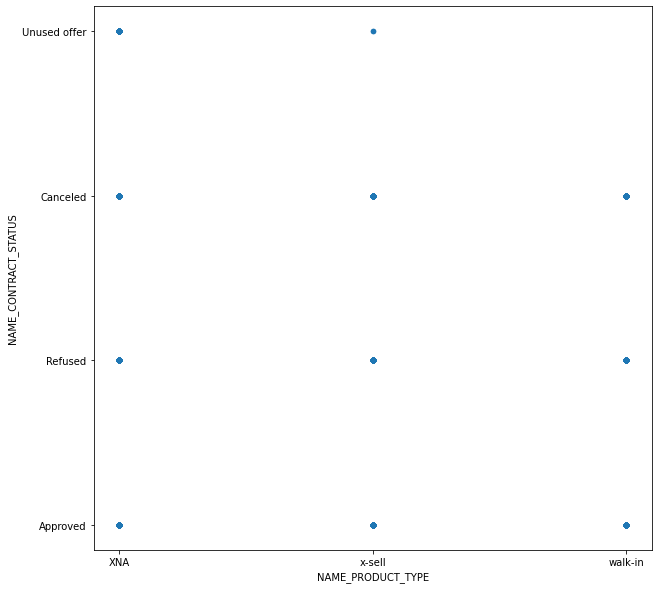

In [131]:
PreAppData.plot.scatter(x = "NAME_PRODUCT_TYPE", y ="NAME_CONTRACT_STATUS")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

# CORRELATION MATRIX

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_CONTRACT_STATUS']

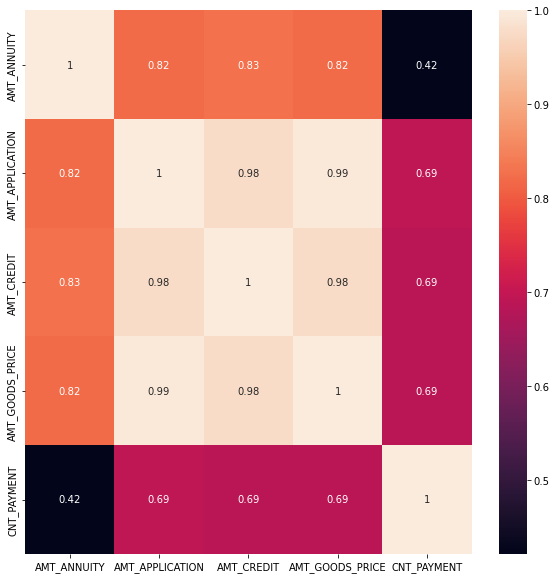

In [132]:

sns.heatmap(PreAppData[["NAME_CONTRACT_TYPE", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE" ,"NAME_CASH_LOAN_PURPOSE", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON","NAME_CLIENT_TYPE" ,"CNT_PAYMENT"]].corr(),annot =True)

          
['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']

# TOP 10 CORRELATIONS OF PREVIOUS APPLICATIONS


In [133]:
corr=PreAppData.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.994925
47,AMT_CREDIT,AMT_APPLICATION,0.975808
59,AMT_GOODS_PRICE,AMT_CREDIT,0.975785
46,AMT_CREDIT,AMT_ANNUITY,0.826553
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.821077
35,AMT_APPLICATION,AMT_ANNUITY,0.819494
113,CNT_PAYMENT,AMT_APPLICATION,0.693110
114,CNT_PAYMENT,AMT_CREDIT,0.687139
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.686902
112,CNT_PAYMENT,AMT_ANNUITY,0.421089


MERGING

In [134]:

Merged_data = pd.merge(NewAppData, PreAppData,how='inner', on=['SK_ID_CURR'])

Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [135]:
Merged_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE_x           0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT_x                   0
AMT_ANNUITY_x                  0
AMT_GOODS_PRICE_x              0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
ORGANIZATION_TYPE              0
DAYS_LAST_PHONE_CHANGE         0
AGE                            0
AGE_GROUP                      4
AMT_INCOME_TOTAL_BIN           0
AMT_CREDIT_BIN                 0
SK_ID_PREV                     0
NAME_CONTRACT_TYPE_y           0
AMT_ANNUIT

CONCLUTION

>Banks can issue loans to those applicants who live in House/Apartments, Rented Apartments.

>Banks should focus on promoting more cash loans and consumer loans as its the most common contract type amongst all applicants.

>Banks should focus on applicants with higher education and academic degrees who have high income.

>Bank must avoid giving loans to applicants with more number of children.

>Banks must issue Loans to Business men(Both Male and Female) and students as they do not find it difficult to pay.

